In [1]:
import yfinance as yf
import pandas as pd

def getftse100_tickers():
    return list(set([
        'AZN.L', 'HSBA.L', 'BP.L', 'RIO.L', 'GSK.L', 'ULVR.L', 'DGE.L', 'BATS.L', 'REL.L', 'NG.L',
        'LLOY.L', 'BARC.L', 'SHEL.L', 'GLEN.L', 'IMB.L', 'RR.L', 'STAN.L', 'PRU.L', 'ASHM.L', 'BA.L',
        'ADM.L', 'AAL.L', 'ANTO.L', 'AUTO.L', 'BHP.L', 'BLND.L', 'CCL.L', 'CRH.L', 'CPG.L', 'EXPN.L',
        'HLMA.L', 'IAG.L', 'IHG.L', 'INF.L', 'ITRK.L', 'JD.L', 'KGF.L', 'LAND.L', 'LGEN.L', 'MNG.L',
        'MRO.L', 'NXT.L', 'PHNX.L', 'PSN.L', 'PSON.L', 'RMV.L', 'RTO.L', 'SGE.L', 'SMIN.L', 'SMT.L',
        'SN.L', 'SPX.L', 'SSE.L', 'STJ.L', 'SVT.L', 'TSCO.L', 'TW.L', 'VOD.L', 'WTB.L', 'WPP.L',
        'III.L', 'ITV.L', 'OCDO.L', 'EZJ.L', 'SPT.L', 'MER.L', 'INCH.L', 'IGG.L', 'FLTR.L', 'DCC.L',
        'FRES.L', 'HIK.L', 'HLN.L', 'JMAT.L', 'LRE.L', 'MNDI.L', 'MONY.L', 'PNN.L', 'SGRO.L', 'SMDS.L',
        'TRY.L', 'WOSG.L', 'BEZ.L', 'CNA.L', 'ENT.L', 'FERG.L', 'TUI1.DE', 'BNZL.L', 'CCH.L', 'DOCS.L',
        'LSEG.L', 'RKT.L', 'WEIR.L', 'HWDN.L', 'FOUR.L', 'FGP.L', 'BKG.L', 'VCT.L', 'WG.L', 'AV.L'
    ]))

# Downloads adjusted close price data from Yahoo Finance and saves to CSV

def fetch_and_store_adjclose(tickers, start_date, end_date, filename="ftse100_adjclose_2023.csv"):
    print(f"Downloading data for {len(tickers)} tickers...")
    data = yf.download(
        tickers=tickers,
        start=start_date,
        end=end_date,
        group_by='ticker',
        auto_adjust=False,
        progress=True,
        threads=True
    )

    adjclose_df = pd.DataFrame()
    failed_tickers = []

    for ticker in tickers:
        try:
            adj = data[ticker]['Adj Close']
            adj.name = ticker
            adjclose_df[ticker] = adj
        except Exception as e:
            print(f" {ticker} failed: {e}")
            failed_tickers.append(ticker)
            
    # Save data to CSV if any data was successfully retrieved
    if not adjclose_df.empty:
        adjclose_df.to_csv(filename)
        print(f"\n Saved to {filename}")
    else:
        print("\n No data saved, all tickers failed.")
        
    # Print out any failed tickers for debugging
    if failed_tickers:
        print("\n Failed tickers:")
        for ft in failed_tickers:
            print(ft)

# Main
if __name__ == "__main__":
    tickers = getftse100_tickers()
    start_date = "2023-01-01"
    end_date = "2023-12-31"
    fetch_and_store_adjclose(tickers, start_date, end_date)


[*********************100%***********************]  99 of 100 completed

100 Failed downloads:
['MONY.L', 'HIK.L', 'WEIR.L', 'LAND.L', 'EZJ.L', 'HLN.L', 'CCL.L', 'ITV.L', 'CNA.L', 'ITRK.L', 'RR.L', 'PRU.L', 'OCDO.L', 'MER.L', 'BA.L', 'TRY.L', 'FGP.L', 'BARC.L', 'ULVR.L', 'INCH.L', 'TW.L', 'SN.L', 'RIO.L', 'LLOY.L', 'MNG.L', 'FRES.L', 'HSBA.L', 'BP.L', 'BHP.L', 'GLEN.L', 'SGE.L', 'SMDS.L', 'BEZ.L', 'CCH.L', 'KGF.L', 'EXPN.L', 'CPG.L', 'ENT.L', 'SMIN.L', 'DOCS.L', 'STJ.L', 'IAG.L', 'SPT.L', 'LGEN.L', 'VCT.L', 'FLTR.L', 'WG.L', 'NXT.L', 'INF.L', 'CRH.L', 'JD.L', 'ADM.L', 'GSK.L', 'ASHM.L', 'AZN.L', 'FERG.L', 'FOUR.L', 'WTB.L', 'HWDN.L', 'AV.L', 'SVT.L', 'BKG.L', 'JMAT.L', 'IHG.L', 'WPP.L', 'SMT.L', 'VOD.L', 'LSEG.L', 'TUI1.DE', 'SSE.L', 'RKT.L', 'MNDI.L', 'WOSG.L', 'SHEL.L', 'DCC.L', 'BLND.L', 'PSN.L', 'TSCO.L', 'MRO.L', 'NG.L', 'ANTO.L', 'HLMA.L', 'LRE.L', 'IMB.L', 'PSON.L', 'RTO.L', 'PNN.L', 'DGE.L', 'BNZL.L', 'RMV.L', 'REL.L', 'IGG.L', 'SGRO.L', 'AAL.L', 'AUTO.L', 'STAN.L', 'BATS.L', '


 No data saved, all tickers failed.


 Plotting 100 tickers


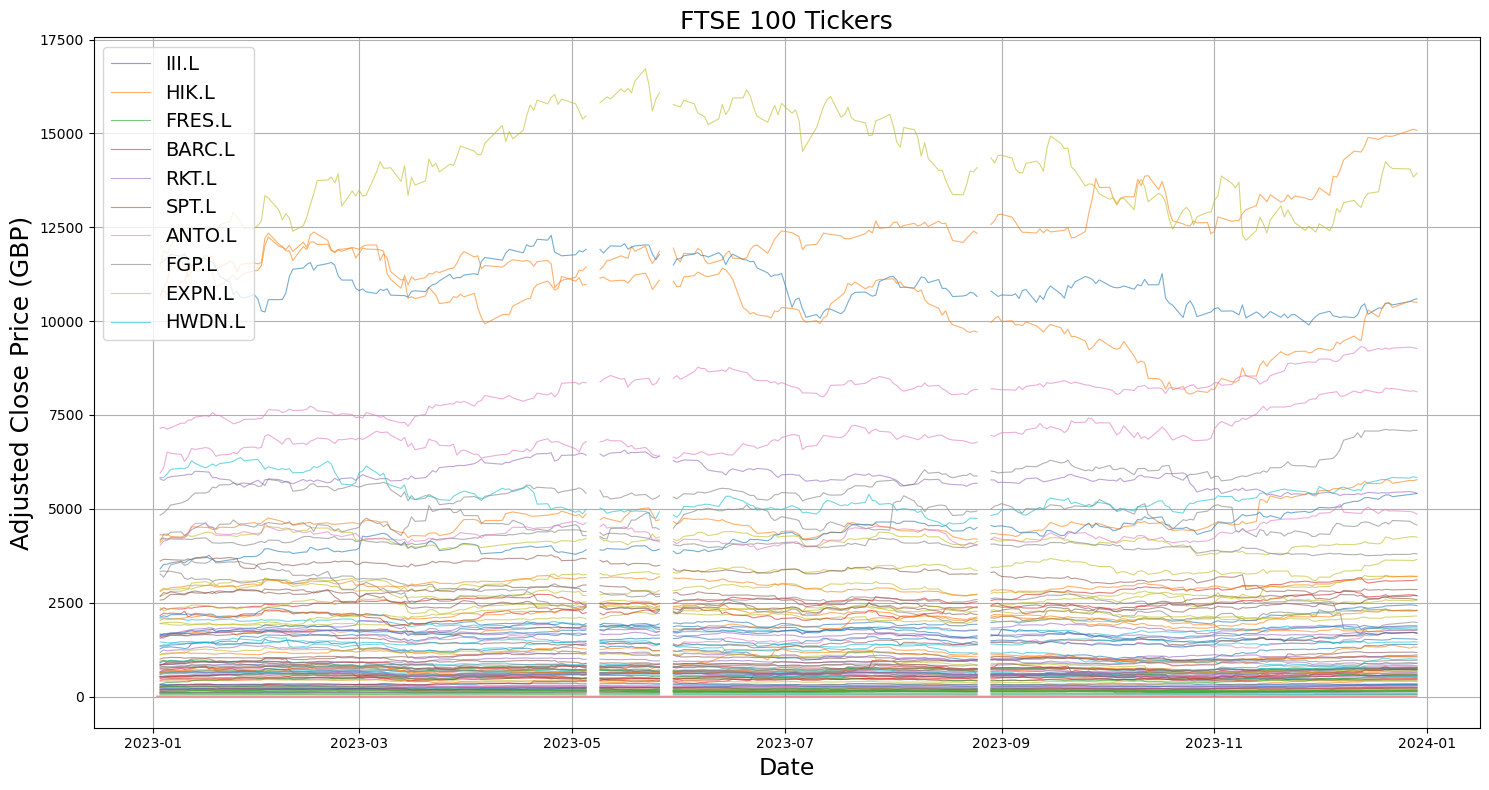

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
data_ftse = pd.read_csv("ftse100_adjclose_2023.csv", index_col=0, parse_dates=True)

# Print number of successful tickers
print(f" Plotting {data_ftse.shape[1]} tickers")

# Plot all tickers
plt.figure(figsize=(15, 8))
for ticker in data_ftse.columns:
    plt.plot(data_ftse.index, data_ftse[ticker], linewidth=0.8, alpha=0.6, label=ticker)

plt.title("FTSE 100 Tickers", fontsize=18)
plt.xlabel("Date",fontsize=17)
plt.legend(data_ftse.columns[:10], loc="upper left", fontsize=14)
plt.ylabel("Adjusted Close Price (GBP)",fontsize=18)
plt.grid(True)

plt.tight_layout()
plt.show()


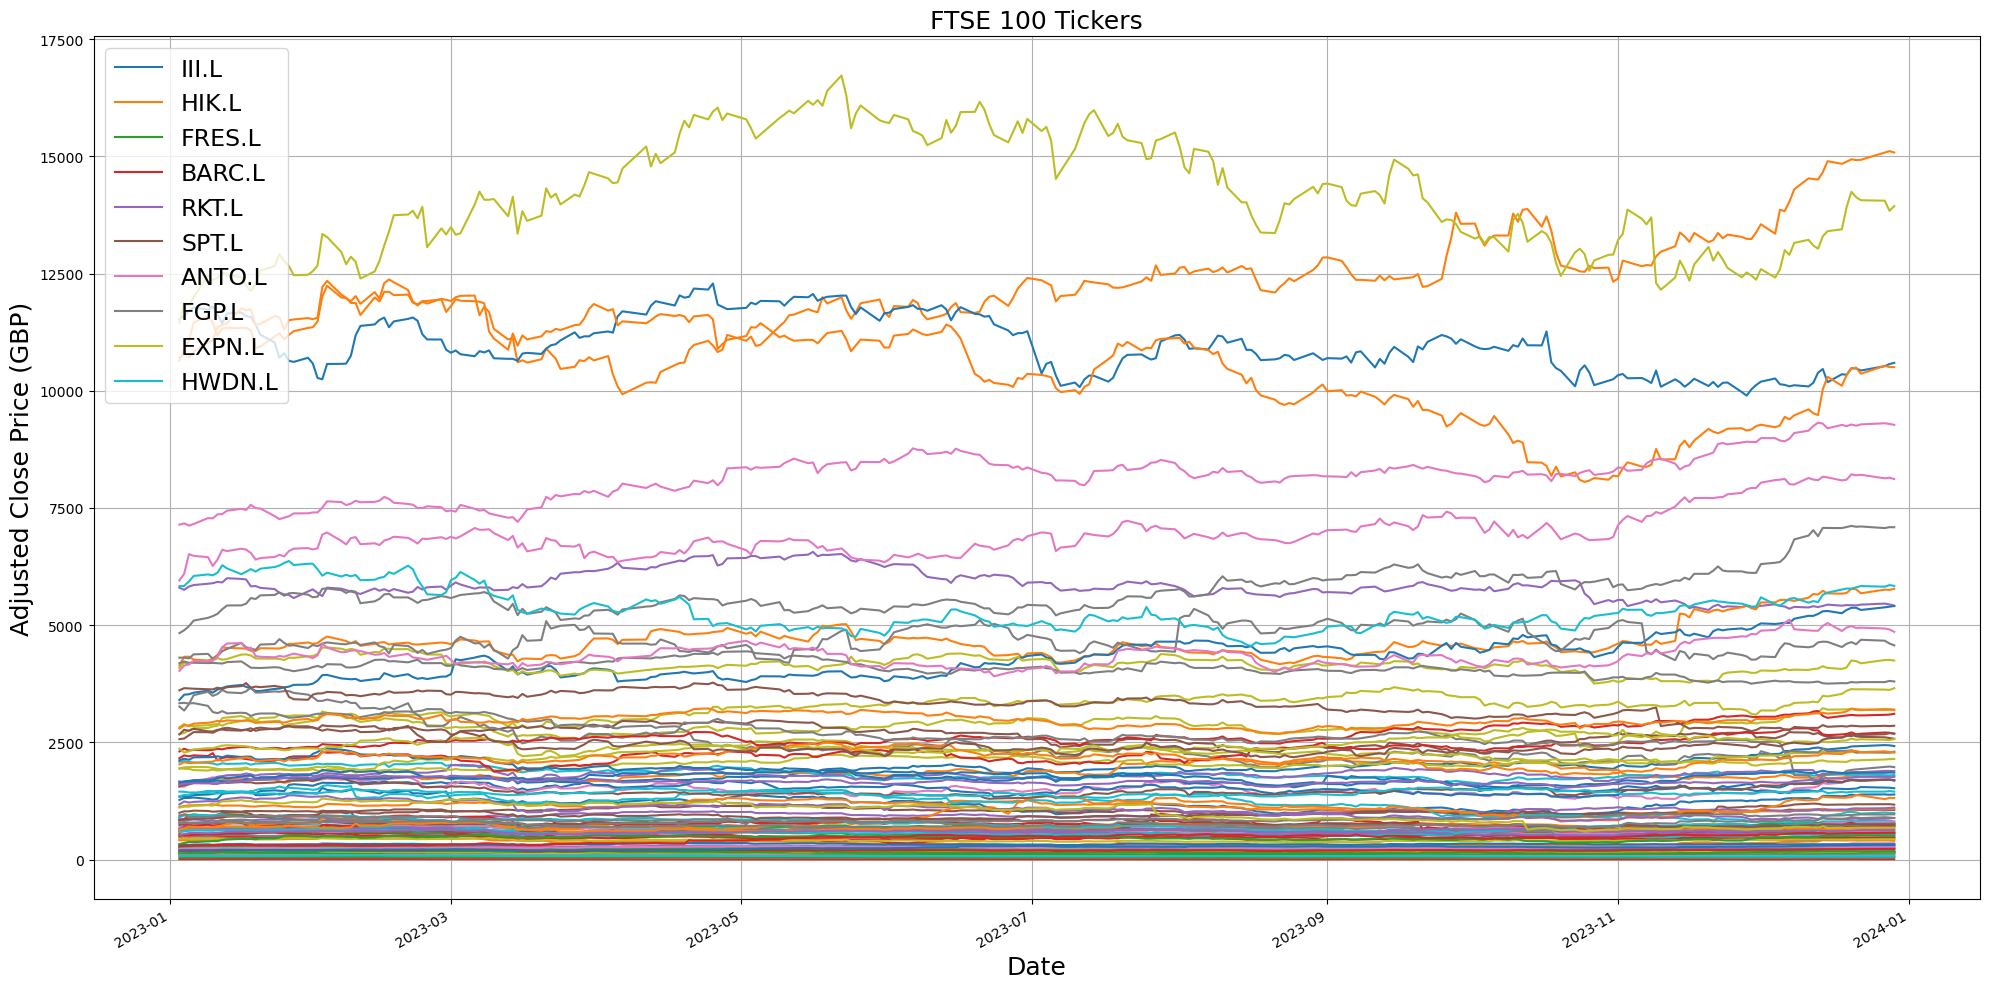

In [2]:

#  Remove rows with any missing values 
cleaned_data = data_ftse.dropna()

# Plot the cleaned data 
plt.figure(figsize=(20, 10))

# Plot the stocks
cleaned_data[data_ftse.columns].plot(ax=plt.gca(), legend=True)

# Customize the plot
plt.title("FTSE 100 Tickers",fontsize=18)
plt.xlabel("Date",fontsize=18)
plt.ylabel("Adjusted Close Price (GBP)",fontsize=18)
plt.grid(True)
plt.legend(data_ftse.columns[:10], loc="upper left", fontsize=17)
plt.tight_layout()

# Show the plot
plt.show()


In [3]:
print(cleaned_data.head())


                  III.L        HIK.L      FRES.L      BARC.L        RKT.L  \
Date                                                                        
2023-01-03  1339.376953  1619.560181  901.316956  163.421204  5800.064941   
2023-01-04  1348.872437  1604.573486  967.096375  167.896301  5754.113281   
2023-01-05  1349.871948  1646.036621  945.903015  172.231552  5824.041016   
2023-01-06  1374.360596  1673.012573  964.697144  171.911911  5856.007812   
2023-01-09  1387.354614  1664.020630  931.507568  172.431335  5883.979980   

                 SPT.L       ANTO.L       FGP.L       EXPN.L      HWDN.L  ...  \
Date                                                                      ...   
2023-01-03  265.302612  1561.373535  102.735291  2823.202881  581.541260  ...   
2023-01-04  273.899445  1553.376709  104.134399  2891.183838  600.126526  ...   
2023-01-05  276.298553  1609.854004  104.434219  2844.333740  616.113953  ...   
2023-01-06  276.298553  1654.336182  104.933907  2850.3

In [7]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np

# Function for calculate ADF test p-value
def calculate_adf_pvalue(series):
    try:
        return adfuller(series.dropna())[1]
    except ValueError:
        return np.nan

# normalization methods
methods = {
    'min_max': MinMaxScaler(),
    'z_score': StandardScaler(),
    'robust_scaling': RobustScaler(),
    'percentage_returns': 'pct',
    'log_returns': 'log'
}

results = {}

# Apply each method
for name, method in methods.items():
    if method == 'pct':
        transformed = cleaned_data.pct_change().dropna()
    elif method == 'log':
        transformed = np.log(cleaned_data / cleaned_data.shift(1)).dropna()
    else:
        transformed = pd.DataFrame(
            method.fit_transform(cleaned_data),
            columns=cleaned_data.columns,
            index=cleaned_data.index
        )

    summary_calculations = {
        'mean': transformed.mean().mean(),
        'std': transformed.std().mean(),
        'min': transformed.min().min(),
        'max': transformed.max().max(),
        'median': transformed.median().median(),
        'skewness': transformed.skew().mean(),
        'kurtosis': transformed.kurtosis().mean(),
        'adf_pvalue': transformed.apply(calculate_adf_pvalue).mean()
    }
    results[name] = summary_calculations

# Display the comparison table
results_df = pd.DataFrame(results).T
display(results_df)

ranking = results_df[['adf_pvalue']].sort_values('adf_pvalue')
print(ranking)


,mean,std,min,max,median,skewness,kurtosis,adf_pvalue
min_max,4.640820e-01,0.239183,0.000000,1.000000,0.435136,0.275022,-0.441623,0.461463
z_score,-1.151624e-16,1.001998,-3.105009,3.214495,-0.101766,0.275022,-0.441623,0.461463
robust_scaling,5.782372e-02,0.735999,-2.586065,3.968632,0.000000,0.275022,-0.441623,0.461463
percentage_returns,4.678941e-04,0.017390,-0.344292,0.320465,0.000532,-0.198200,7.163610,0.000015
log_returns,2.940457e-04,0.017483,-0.422040,0.277984,0.000532,-0.423450,7.853310,0.000016


                    adf_pvalue
percentage_returns    0.000015
log_returns           0.000016
robust_scaling        0.461463
min_max               0.461463
z_score               0.461463


C:\Users\divye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\divye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


Silhouette Score (Percentage Returns): 0.1018
Silhouette Score (Z-Score Normalized): 0.0342


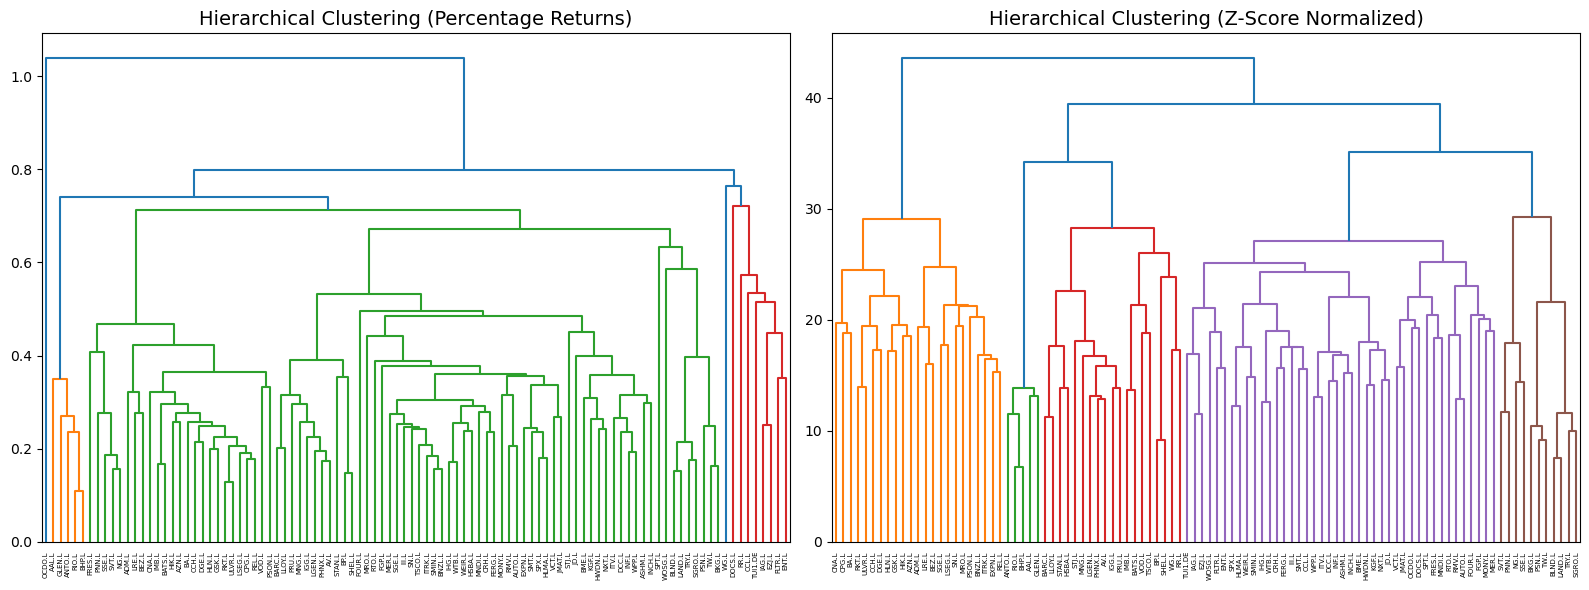

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate percentage returns
percentage_data = cleaned_data.pct_change().dropna()

# Normalize using z-score
zscore_data = pd.DataFrame(StandardScaler().fit_transform(percentage_data),
                            index=percentage_data.index,
                            columns=percentage_data.columns)

# Transpose for clustering
percentage_data = percentage_data.T
zscore_data = zscore_data.T

# KMeans clustering (adjust k)
k = 5
kmeans_pct = KMeans(n_clusters=k, random_state=42).fit(percentage_data)
kmeans_z = KMeans(n_clusters=k, random_state=42).fit(zscore_data)

# Evaluate clustering with silhouette score
silhouette_pct = silhouette_score(percentage_data, kmeans_pct.labels_)
silhouette_z = silhouette_score(zscore_data, kmeans_z.labels_)

print(f"Silhouette Score (Percentage Returns): {silhouette_pct:.4f}")
print(f"Silhouette Score (Z-Score Normalized): {silhouette_z:.4f}")

# Hierarchical clustering (ward)
linkage_pct = linkage(percentage_data, method='ward')
linkage_z = linkage(zscore_data, method='ward')

# Plot the dendrograms 
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
dendrogram(linkage_pct, labels=percentage_data.index, leaf_rotation=90)
plt.title("Hierarchical Clustering (Percentage Returns)", fontsize=14)

plt.subplot(1, 2, 2)
dendrogram(linkage_z, labels=zscore_data.index, leaf_rotation=90)
plt.title("Hierarchical Clustering (Z-Score Normalized)", fontsize=14)

plt.tight_layout()
plt.show()


C:\Users\divye\AppData\Local\Temp\ipykernel_68680\572978656.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=returns_melted, x="Stock", y="Daily Return", showfliers=True, palette="cividis" )


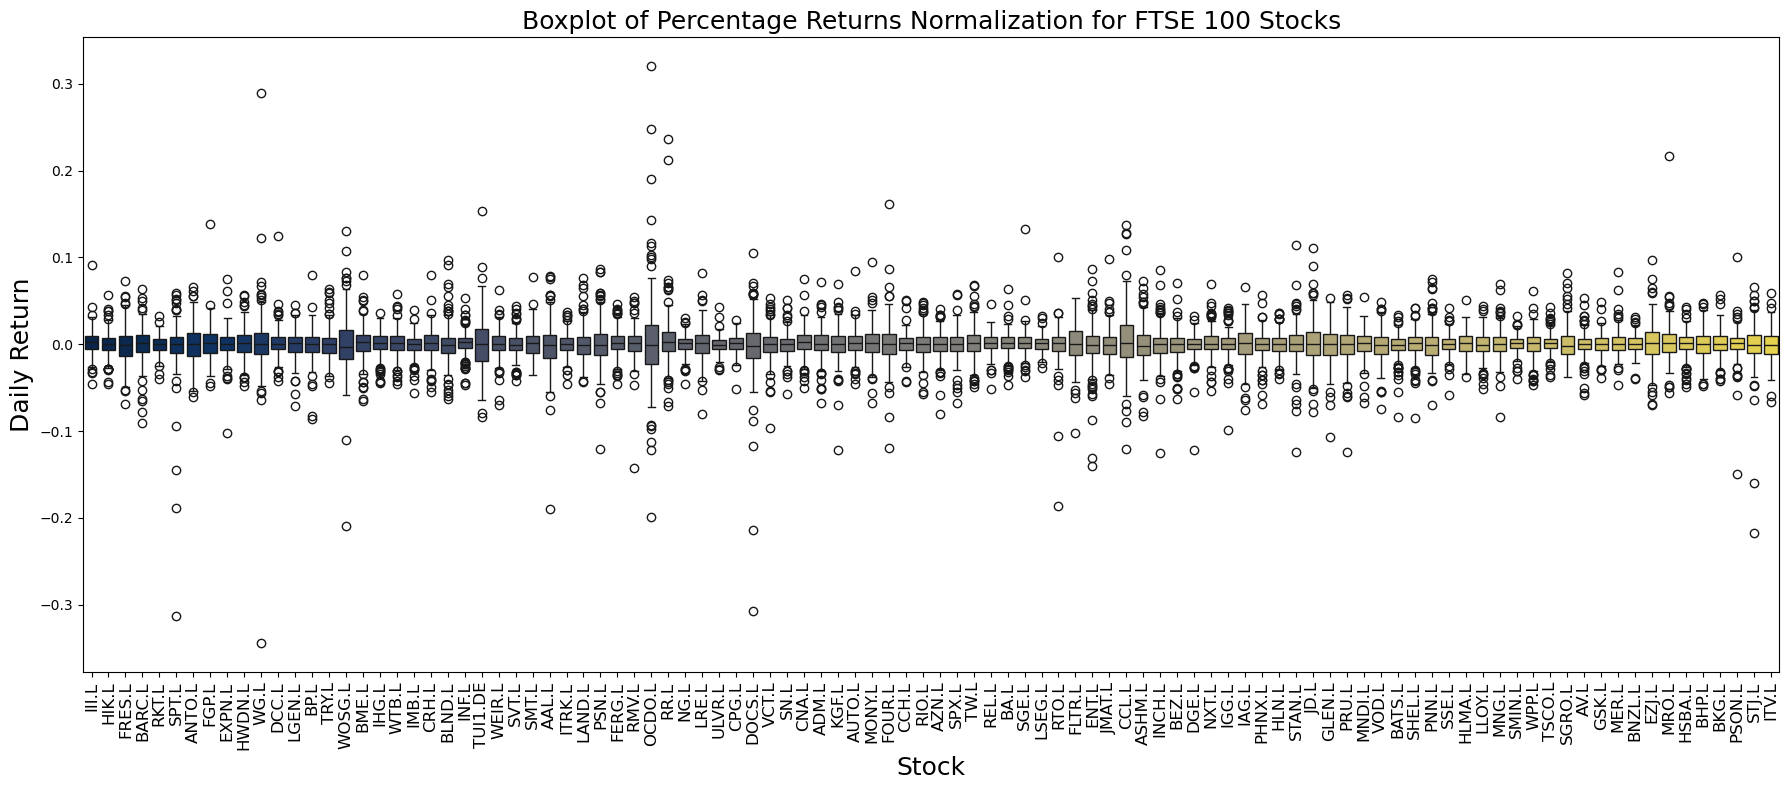

In [6]:

import matplotlib.pyplot as plt
import seaborn as sns
# Calculate percentage returns
percentage_returns = cleaned_data.pct_change().dropna()

returns_melted = percentage_returns.melt(var_name="Stock", value_name="Daily Return")

# Plot the boxplot
plt.figure(figsize=(18, 8))
sns.boxplot(data=returns_melted, x="Stock", y="Daily Return", showfliers=True, palette="cividis" )
plt.xticks(rotation=90, fontsize=12)
plt.title("Boxplot of Percentage Returns Normalization for FTSE 100 Stocks", fontsize=18)
plt.ylabel("Daily Return",fontsize=18)
plt.xlabel("Stock",fontsize=18)
plt.tight_layout()
plt.show()


C:\Users\divye\AppData\Local\Temp\ipykernel_68680\4149831049.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=skew_values.index, y=skew_values.values, palette="magma")


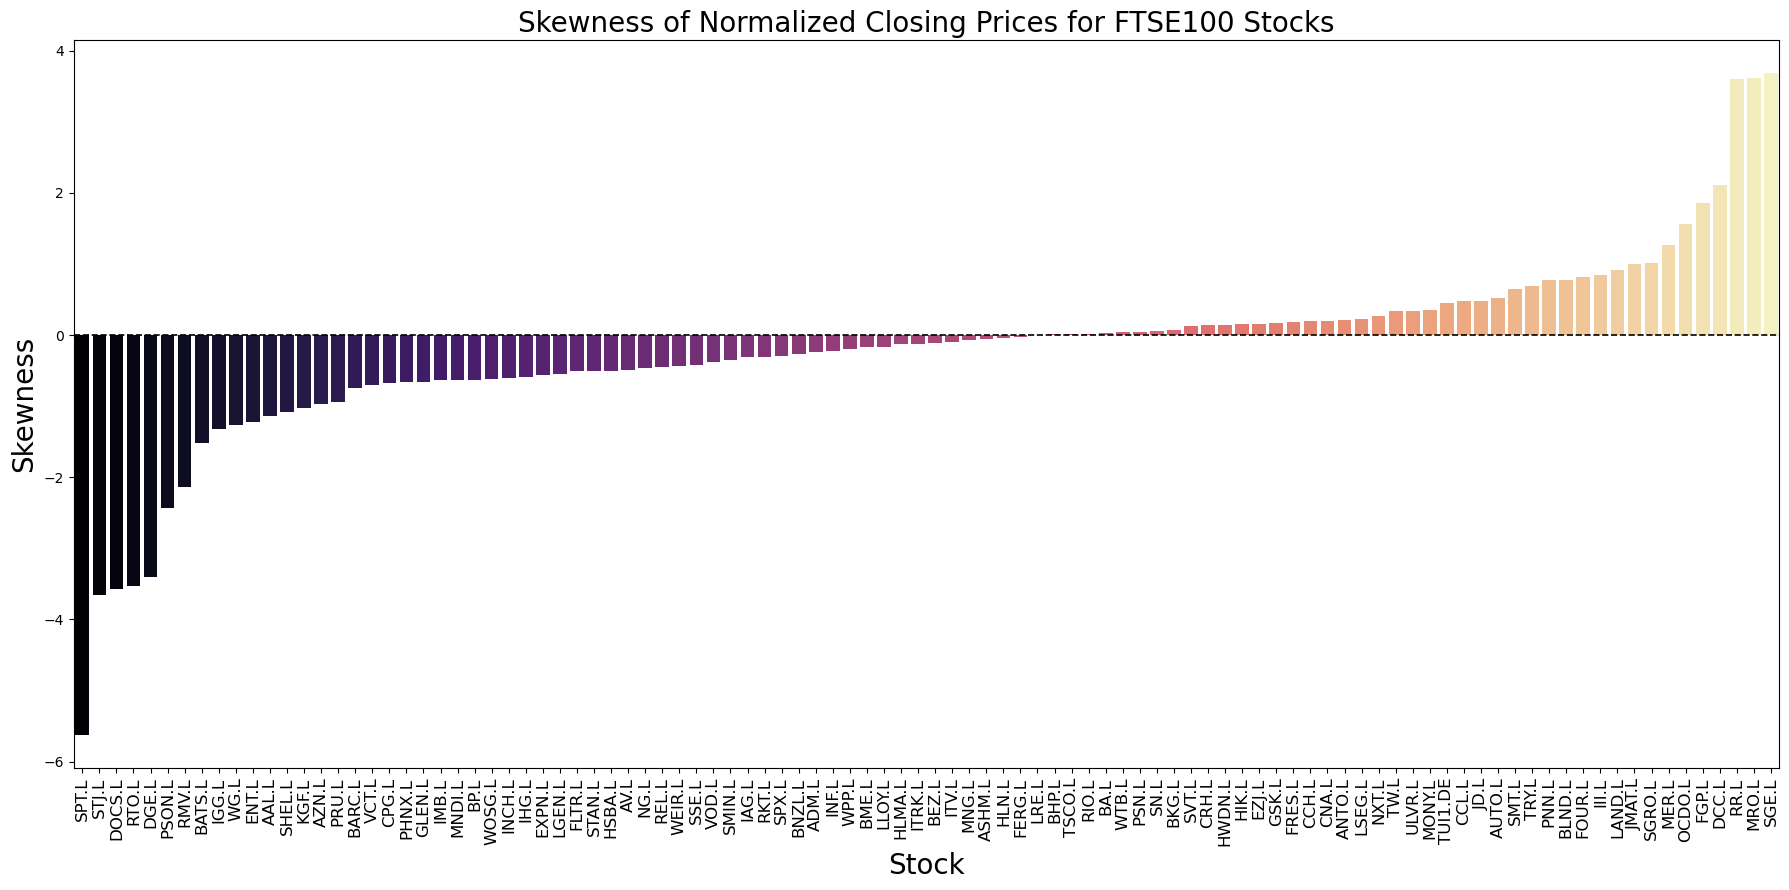

In [7]:

# Calculate skewness for each stock 
skew_values = percentage_returns.skew().sort_values()

# Plot skewness values as a bar chart
plt.figure(figsize=(18, 9))
sns.barplot(x=skew_values.index, y=skew_values.values, palette="magma")

# Plot the skewness
plt.xticks(rotation=90, fontsize=12)
plt.title("Skewness of Normalized Closing Prices for FTSE100 Stocks",fontsize=20)
plt.xlabel("Stock",fontsize=20)
plt.ylabel("Skewness",fontsize=20)
plt.axhline(0, color='black', linewidth=1.2, linestyle='--')  

plt.tight_layout()
plt.show()



C:\Users\divye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\divye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\divye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\divye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

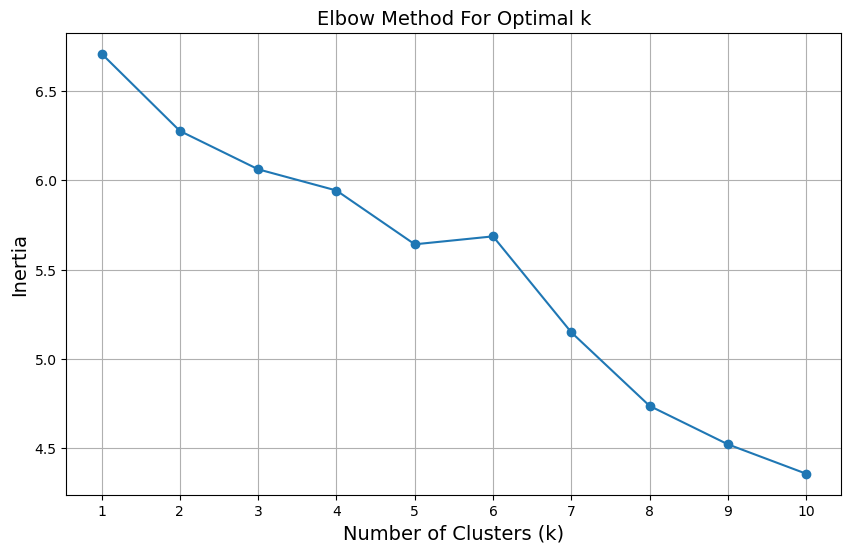

In [8]:
from sklearn.decomposition import PCA

# Transpose Data
X = percentage_returns.T 

# Apply Elbow method
inertia = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K, inertia, marker='o')
plt.title("Elbow Method For Optimal k",fontsize=14)
plt.xlabel("Number of Clusters (k)",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.grid(True)
plt.xticks(K)
plt.show()


C:\Users\divye\anaconda3\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Silhouette Scores:
PCA: 0.207 | t-SNE: -0.150 | UMAP: -0.122

Davies-Bouldin Index:
PCA: 0.739 | t-SNE: 1.188 | UMAP: 1.235


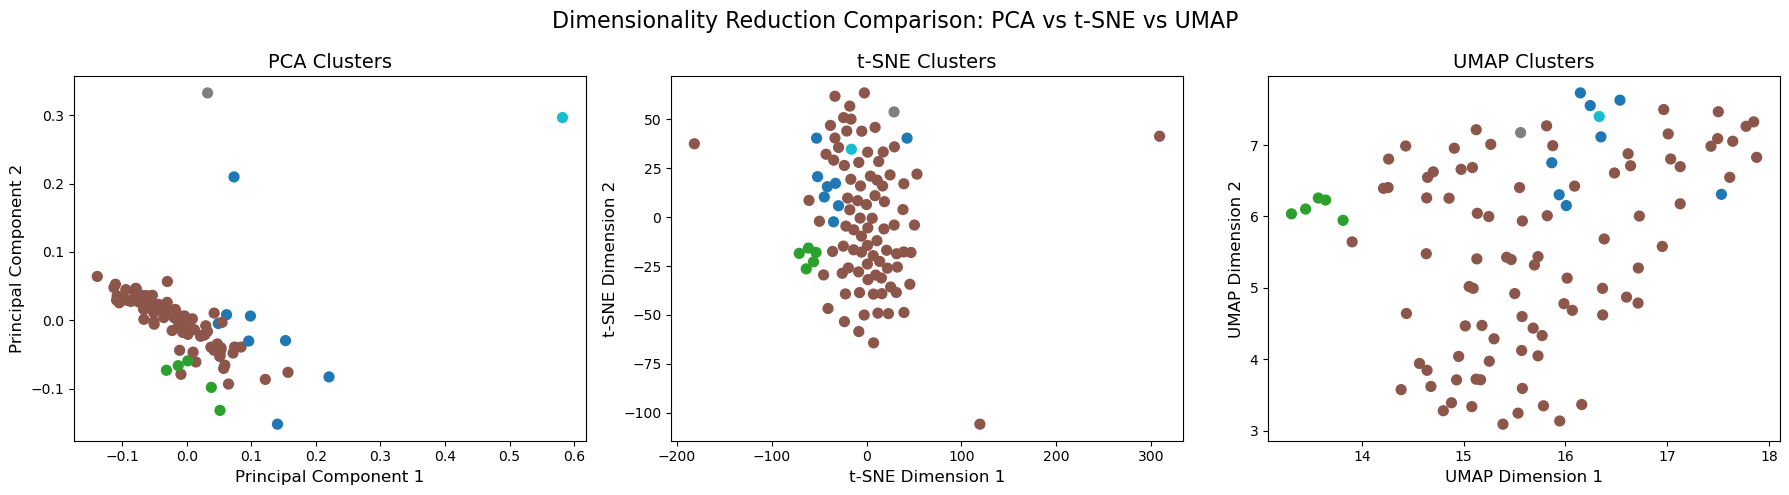

In [9]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.manifold import TSNE
import umap.umap_ as umap
from sklearn.metrics import silhouette_score, davies_bouldin_score


# Transpose percentage returns 
returns_matrix = percentage_returns.T  

# Perform clustering
n_clusters = 5  # set based on Elbow method
clustering_model = AgglomerativeClustering(n_clusters=n_clusters)
cluster_labels = clustering_model.fit_predict(returns_matrix)

#  Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(returns_matrix)

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
tsne_result = tsne.fit_transform(returns_matrix)

# Apply UMAP
reducer = umap.UMAP(random_state=42)
umap_result = reducer.fit_transform(returns_matrix)

# Evaluate cluster quality
sil_pca = silhouette_score(pca_result, cluster_labels)
db_pca = davies_bouldin_score(pca_result, cluster_labels)

sil_tsne = silhouette_score(tsne_result, cluster_labels)
db_tsne = davies_bouldin_score(tsne_result, cluster_labels)

sil_umap = silhouette_score(umap_result, cluster_labels)
db_umap = davies_bouldin_score(umap_result, cluster_labels)

# Print results
print("Silhouette Scores:")
print(f"PCA: {sil_pca:.3f} | t-SNE: {sil_tsne:.3f} | UMAP: {sil_umap:.3f}")

print("\nDavies-Bouldin Index:")
print(f"PCA: {db_pca:.3f} | t-SNE: {db_tsne:.3f} | UMAP: {db_umap:.3f}")

# plot all three dimentional reduction technique
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# PCA
axs[0].scatter(pca_result[:, 0], pca_result[:, 1], c=cluster_labels, cmap='tab10', s=50)
axs[0].set_title('PCA Clusters', fontsize=14)
axs[0].set_xlabel('Principal Component 1', fontsize=12)
axs[0].set_ylabel('Principal Component 2', fontsize=12)

# t-SNE
axs[1].scatter(tsne_result[:, 0], tsne_result[:, 1], c=cluster_labels, cmap='tab10', s=50)
axs[1].set_title('t-SNE Clusters', fontsize=14)
axs[1].set_xlabel('t-SNE Dimension 1',fontsize=12)
axs[1].set_ylabel('t-SNE Dimension 2', fontsize=12)

# UMAP
axs[2].scatter(umap_result[:, 0], umap_result[:, 1], c=cluster_labels, cmap='tab10', s=50)
axs[2].set_title('UMAP Clusters', fontsize=14)
axs[2].set_xlabel('UMAP Dimension 1', fontsize=12)
axs[2].set_ylabel('UMAP Dimension 2', fontsize=12)

plt.suptitle('Dimensionality Reduction Comparison: PCA vs t-SNE vs UMAP', fontsize=16)
plt.tight_layout()
plt.show()


C:\Users\divye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


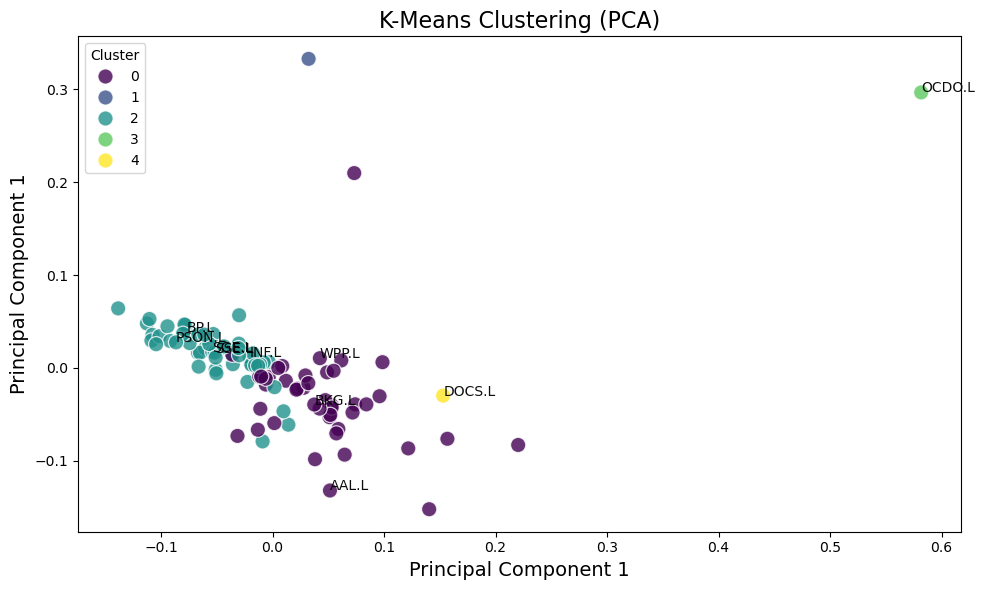

In [10]:

# Transpose the percentage returns
stock_returns = percentage_returns.T

# Apply k-Means Clustering
kmeans_model = KMeans(n_clusters=5, random_state=2, n_init=100)
cluster_labels = kmeans_model.fit_predict(stock_returns)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(stock_returns)

# Create a DataFrame for clustering
pca_df = pd.DataFrame(reduced_data, columns=["PC1", "PC2"])
pca_df["Cluster"] = cluster_labels
pca_df["Ticker"] = stock_returns.index

np.random.seed(32)
label_indices = np.random.choice(pca_df.index, size=10, replace=False)

# Plot the clustered stocks in 2D 
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="viridis", s=120, alpha=0.8, ax=ax)
for i in label_indices:
    ax.text(pca_df.loc[i, "PC1"], pca_df.loc[i, "PC2"], pca_df.loc[i, "Ticker"], fontsize=10, alpha=0.95)

ax.set_title("K-Means Clustering (PCA)",fontsize=16)
ax.set_xlabel("Principal Component 1", fontsize=14)
ax.set_ylabel("Principal Component 1",fontsize=14)
plt.tight_layout()
plt.show()

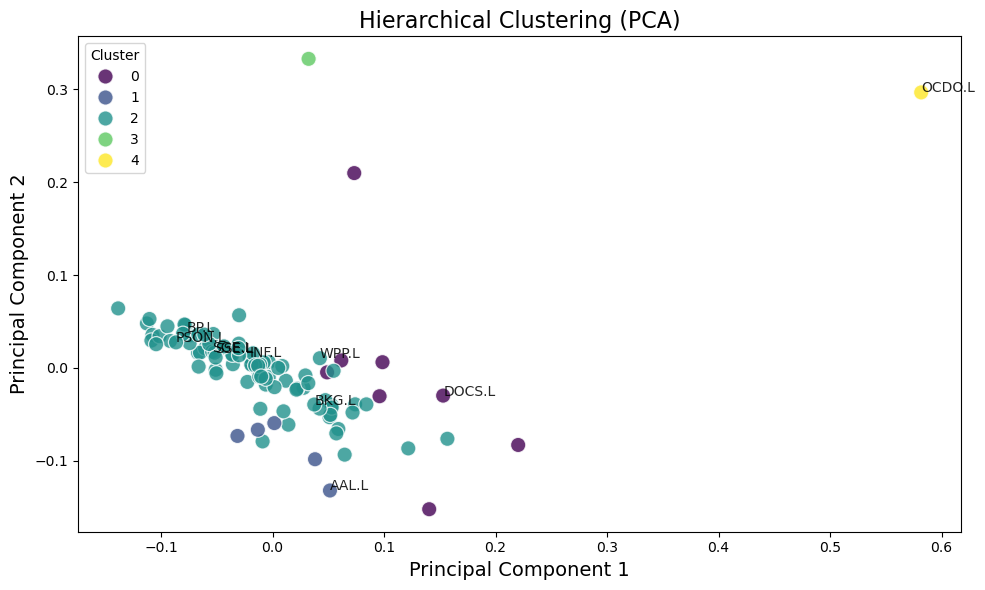

In [11]:
stock_returns = percentage_returns.T

# Apply Agglomerative (Hierarchical) Clustering
hier_model = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster_labels = hier_model.fit_predict(stock_returns)

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(stock_returns)

pca_df = pd.DataFrame(reduced_data, columns=["PC1", "PC2"])
pca_df["Cluster"] = cluster_labels
pca_df["Ticker"] = stock_returns.index

np.random.seed(32)
label_indices = np.random.choice(pca_df.index, size=10, replace=False)

# Create scatter plot of pca data
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="viridis", s=120, alpha=0.8, ax=ax)

for i in label_indices:
    ax.text(pca_df.loc[i, "PC1"], pca_df.loc[i, "PC2"], pca_df.loc[i, "Ticker"], fontsize=10, alpha=0.85)

ax.set_title("Hierarchical Clustering (PCA)",fontsize=16)
ax.set_xlabel("Principal Component 1",fontsize=14)
ax.set_ylabel("Principal Component 2",fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\divye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


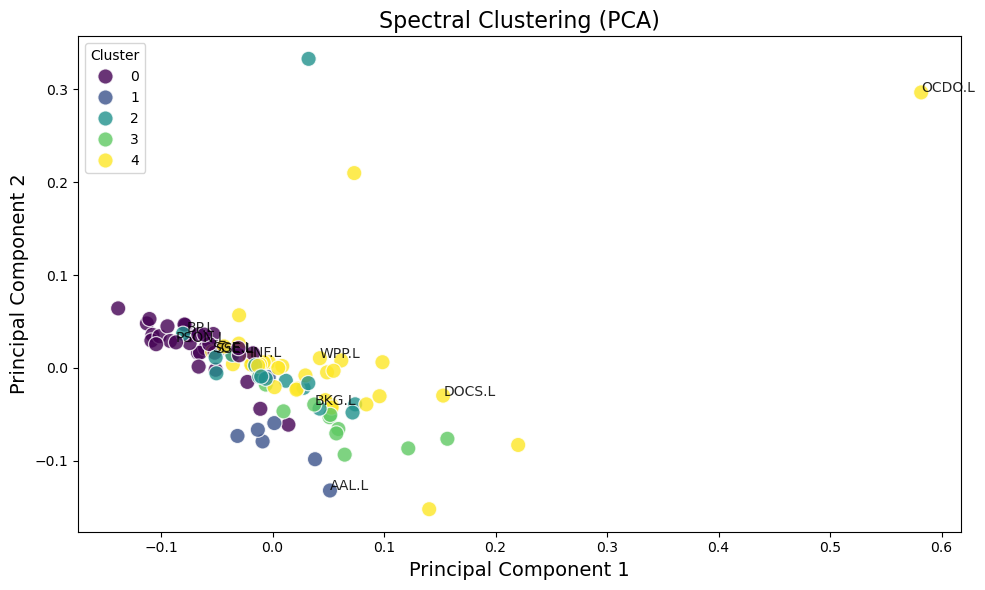

In [13]:
from sklearn.cluster import SpectralClustering
stock_returns = percentage_returns.T

# Apply Spectral Clustering
spectral_model = SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42)
cluster_labels = spectral_model.fit_predict(stock_returns)

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(stock_returns)

pca_df = pd.DataFrame(reduced_data, columns=["PC1", "PC2"])
pca_df["Cluster"] = cluster_labels
pca_df["Ticker"] = stock_returns.index

# create label for stocks
np.random.seed(32)
label_indices = np.random.choice(pca_df.index, size=10, replace=False)

# Create scatter plot of pca data
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="viridis", s=120, alpha=0.8, ax=ax)

for i in label_indices:
    ax.text(pca_df.loc[i, "PC1"], pca_df.loc[i, "PC2"], pca_df.loc[i, "Ticker"], fontsize=10, alpha=0.85)

ax.set_title("Spectral Clustering (PCA)",fontsize=16)
ax.set_xlabel("Principal Component 1",fontsize=14)
ax.set_ylabel("Principal Component 2",fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\divye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


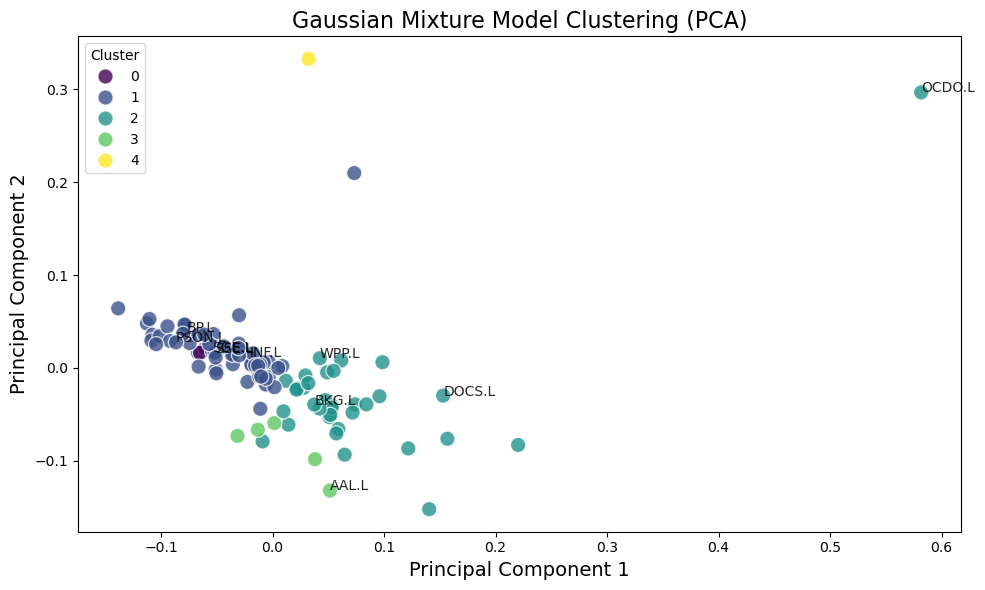

In [17]:
from sklearn.mixture import GaussianMixture
stock_returns = percentage_returns.T

# Apply Gaussian Mixture Clustering
gmm_model = GaussianMixture(n_components=5, random_state=2)
cluster_labels = gmm_model.fit_predict(stock_returns)

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(stock_returns)

pca_df = pd.DataFrame(reduced_data, columns=["PC1", "PC2"])
pca_df["Cluster"] = cluster_labels
pca_df["Ticker"] = stock_returns.index

# create label
np.random.seed(32)
label_indices = np.random.choice(pca_df.index, size=10, replace=False)

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="Cluster", palette="viridis", s=120, alpha=0.8, ax=ax)

for i in label_indices:
    ax.text(pca_df.loc[i, "PC1"], pca_df.loc[i, "PC2"], pca_df.loc[i, "Ticker"], fontsize=10, alpha=0.85)

ax.set_title("Gaussian Mixture Model Clustering (PCA)",fontsize=16)
ax.set_xlabel("Principal Component 1",fontsize=14)
ax.set_ylabel("Principal Component 2",fontsize=14)
plt.tight_layout()
plt.show()

C:\Users\divye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\divye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\divye\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\divye\AppData\Local\Temp\ipykernel_68680\2629173881.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprec

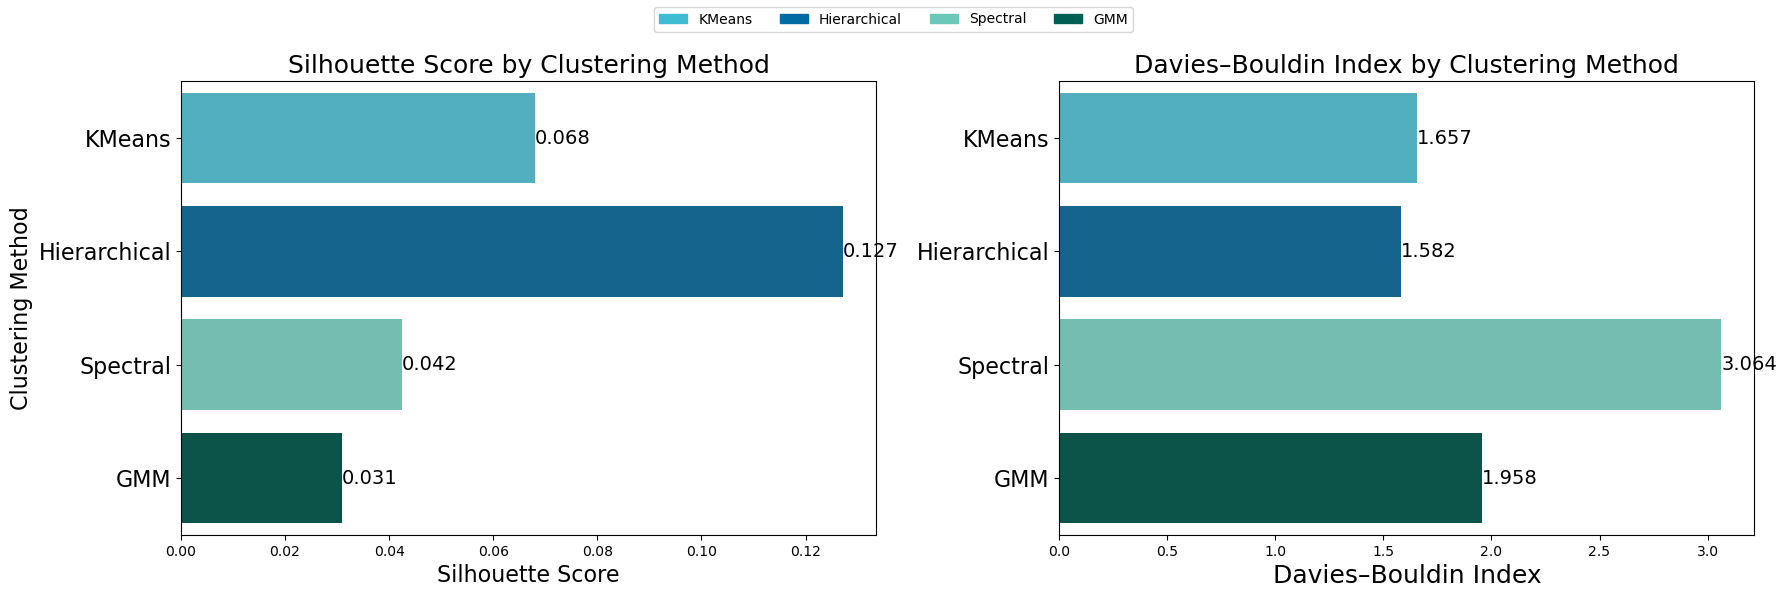

In [19]:
import matplotlib.patches as mpatches
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Use normalized data 
stock_returns = percentage_returns.T

# Store clustering evaluation scores
results = []

# Define clustering models
models = {
    "KMeans": KMeans(n_clusters=5, random_state=2, n_init=100),
    "Hierarchical": AgglomerativeClustering(n_clusters=5, linkage='ward'),
    "Spectral": SpectralClustering(n_clusters=5, affinity='nearest_neighbors', random_state=42),
    "GMM": GaussianMixture(n_components=5, random_state=2)
}

# Evaluate each model using silhouette and Davies-Bouldin 
for method, model in models.items():
    labels = model.fit_predict(stock_returns)
    silhouette = silhouette_score(stock_returns, labels)
    db_index = davies_bouldin_score(stock_returns, labels)
    results.append({
        "Clustering Method": method,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

# Create DataFrame for plotting
score_df = pd.DataFrame(results)

colors = {
    'KMeans': '#3EBCD2',
    'Hierarchical': '#006BA2',
    'Spectral': '#69C9B9',
    'GMM': '#005F52'
}

score_df['Color'] = score_df['Clustering Method'].map(colors)

# Plot the bar graph 
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# plot the Silhouette Score
sns.barplot(data=score_df, y="Clustering Method", x="Silhouette Score", ax=axes[0], palette=score_df.set_index("Clustering Method")["Color"].to_dict())
axes[0].set_title("Silhouette Score by Clustering Method", fontsize=18)
axes[0].set_xlabel("Silhouette Score", fontsize=16)
axes[0].set_ylabel("Clustering Method", fontsize=16)
axes[0].tick_params(axis='y', labelsize=16)
for container in axes[0].containers:
    axes[0].bar_label(container, fmt="%.3f", fontsize=14)

# Plot the Davies Bouldin
sns.barplot(data=score_df, y="Clustering Method", x="Davies-Bouldin Index", ax=axes[1], palette=score_df.set_index("Clustering Method")["Color"].to_dict())
axes[1].set_title("Davies–Bouldin Index by Clustering Method", fontsize=18)
axes[1].set_xlabel("Davies–Bouldin Index", fontsize=18)
axes[1].set_ylabel("")
axes[1].tick_params(axis='y', labelsize=16)
for container in axes[1].containers:
    axes[1].bar_label(container, fmt="%.3f", fontsize=14)

legend_patches = [mpatches.Patch(color=colors[m], label=m) for m in models.keys()]
fig.legend(handles=legend_patches, loc='upper center', ncol=4)

plt.tight_layout(rect=[0, 0, 1, 0.94])
plt.show()


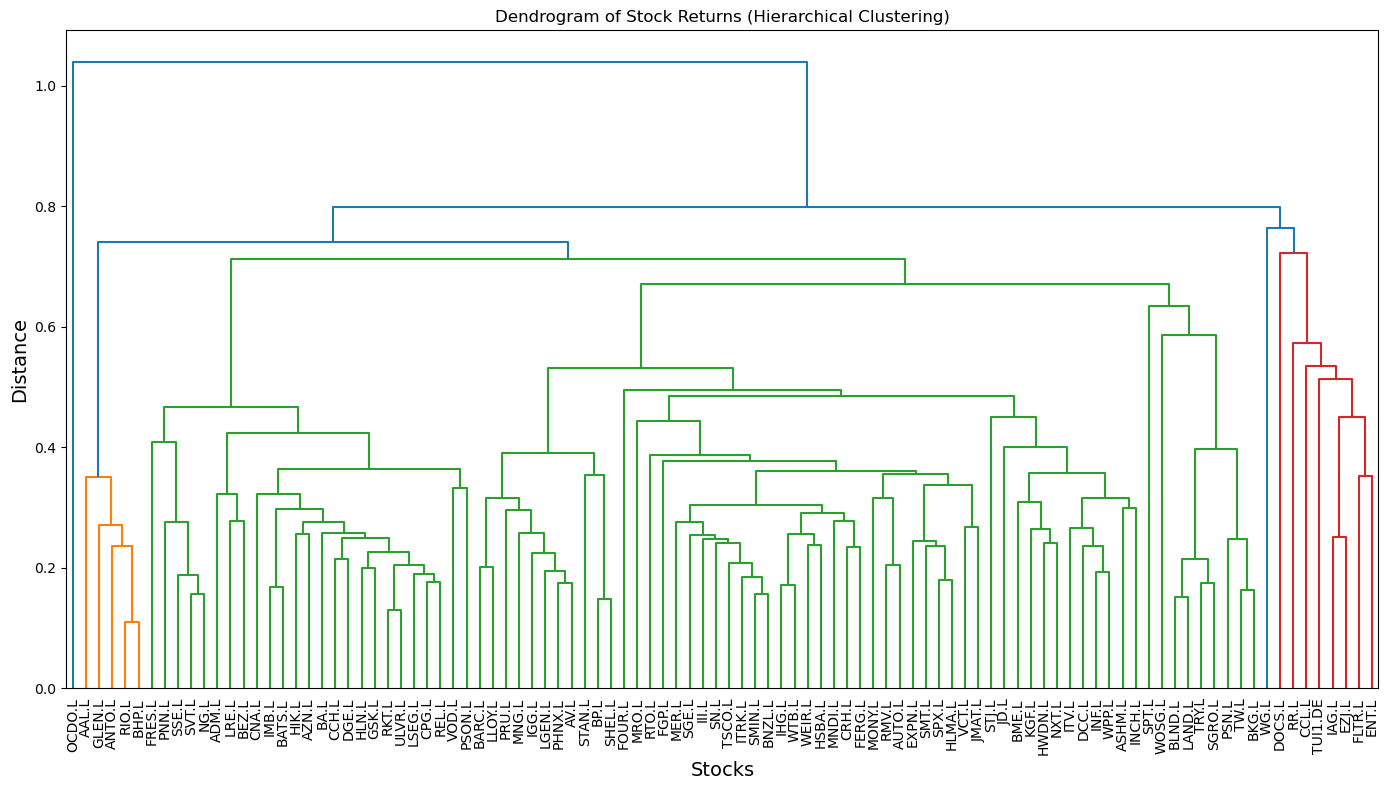

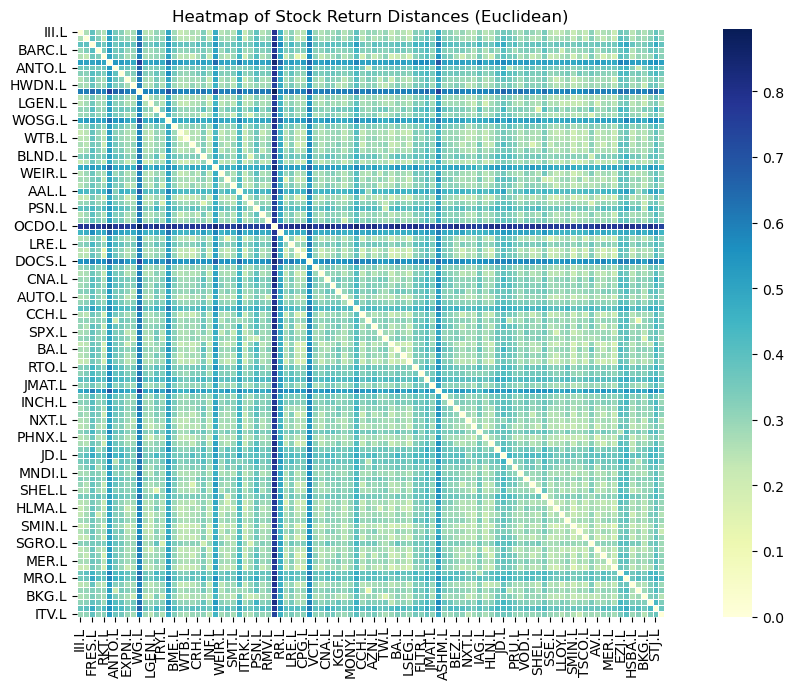

In [20]:
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform

# Plot Dendrogram for Hierarchical Clustering
linked = linkage(stock_returns, method='ward')

plt.figure(figsize=(14, 8))
dendrogram(linked, labels=stock_returns.index, leaf_rotation=90, leaf_font_size=10)
plt.title("Dendrogram of Stock Returns (Hierarchical Clustering)")
plt.xlabel("Stocks", fontsize=14)
plt.ylabel("Distance",fontsize=14)
plt.tight_layout()
plt.show()

# Plot the Heatmap
distances = pdist(stock_returns, metric='euclidean')
dist_matrix = pd.DataFrame(squareform(distances), 
                           index=stock_returns.index, 
                           columns=stock_returns.index)

plt.figure(figsize=(12, 7))
sns.heatmap(dist_matrix, cmap="YlGnBu", square=True, linewidths=0.5)
plt.title("Heatmap of Stock Return Distances (Euclidean)")
plt.tight_layout()
plt.show()


C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


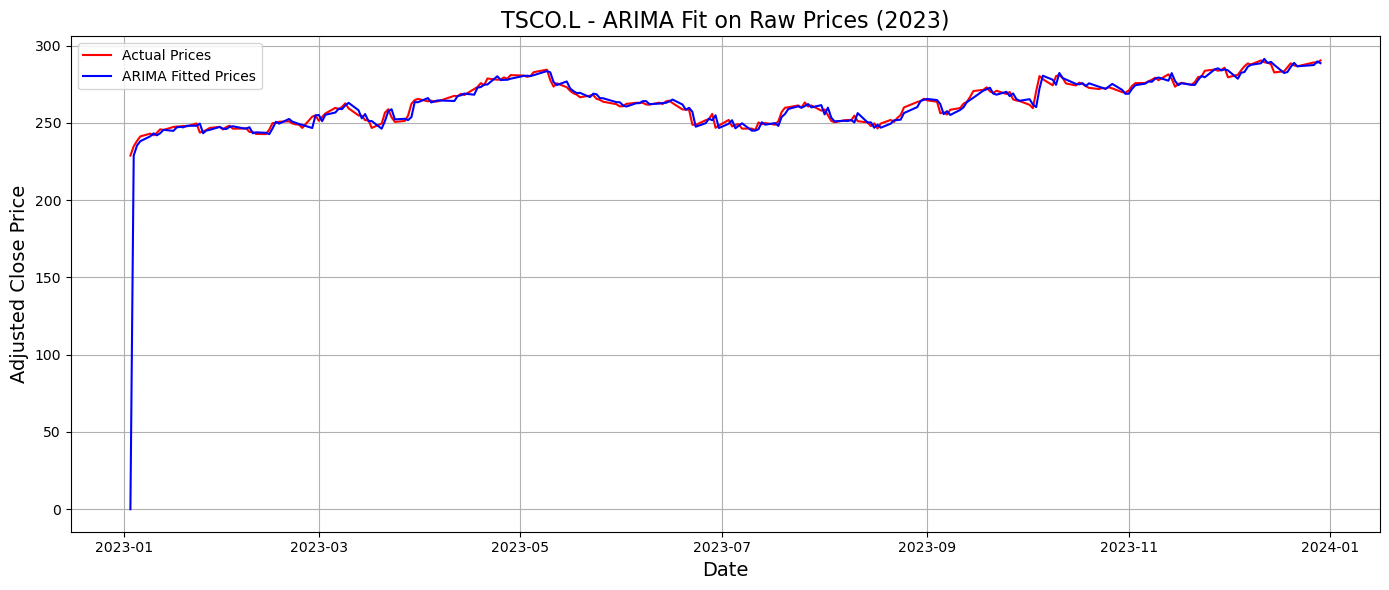

C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE: 4.4634, RMSE: 5.7273


C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


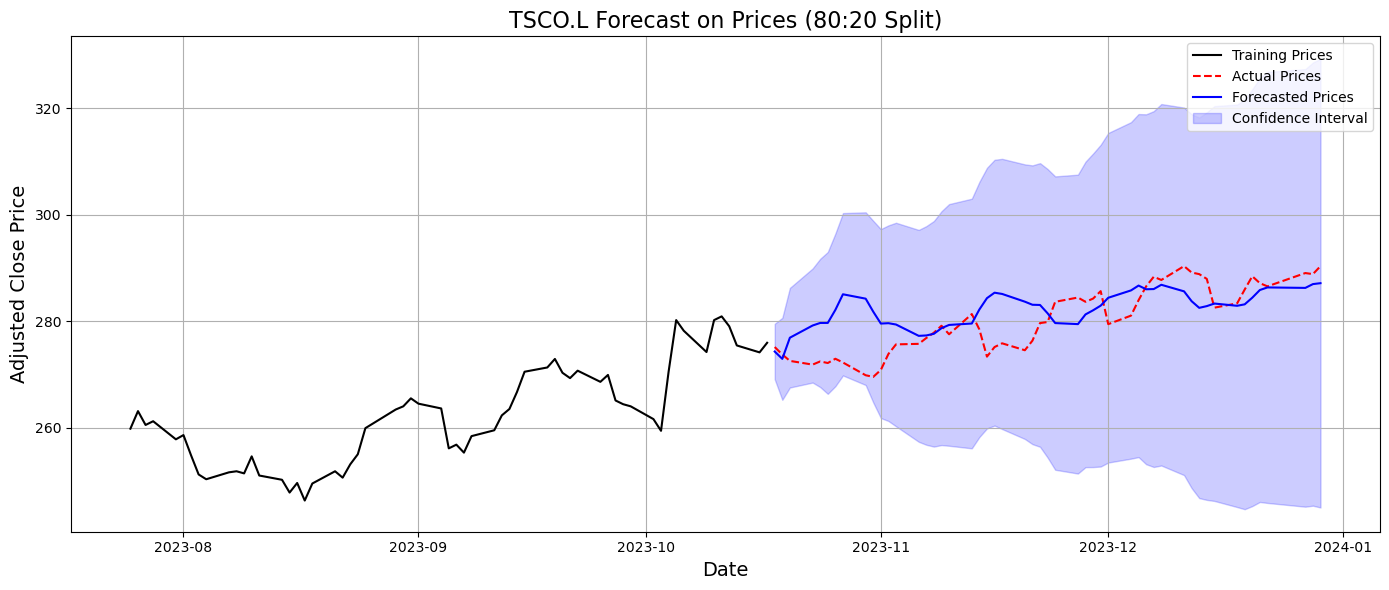

In [50]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Use raw adjusted close prices of TSCO
TSCO_prices = data_ftse["TSCO.L"].dropna()  
TSCO_prices.index = pd.to_datetime(TSCO_prices.index)

# Define ARIMA model 
model_full = sm.tsa.ARIMA(TSCO_prices, order=(40, 1, 2))
results_full = model_full.fit()
fitted_prices = results_full.fittedvalues

# Plot Fitted price of TSCO stock
plt.figure(figsize=(14, 6))
plt.plot(TSCO_prices, label="Actual Prices", color='red')
plt.plot(fitted_prices, label="ARIMA Fitted Prices", color='blue')
plt.title("TSCO.L - ARIMA Fit on Raw Prices (2023)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Adjusted Close Price",fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Split the data into training and test sets (80/20)
split_TSCO = int(len(TSCO_prices) * 0.8)
train_TSCO = TSCO_prices.iloc[:split_TSCO]
test_Data = TSCO_prices.iloc[split_TSCO:]

# Fit ARIMA model on the training set of OCDO stock
model_split = sm.tsa.ARIMA(train_TSCO, order=(40, 1, 2))
results_split = model_split.fit()

# Forecast TSCO stock
forecast = results_split.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

forecast_mean.index = test_Data.index
conf_int.index = test_Data.index

# calculated Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(test_Data, forecast_mean)
rmse = np.sqrt(mean_squared_error(test_Data, forecast_mean))
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# Plot Forecast vs Actual price Of OCDO
plt.figure(figsize=(14, 6))
plt.plot(train_TSCO[-60:], label="Training Prices", color='black')
plt.plot(test_Data, label="Actual Prices", color='red', linestyle='--')
plt.plot(forecast_mean, label="Forecasted Prices", color='blue')
plt.fill_between(forecast_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='blue', alpha=0.2, label="Confidence Interval")
plt.title("TSCO.L Forecast on Prices (80:20 Split)", fontsize=16)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Adjusted Close Price",fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


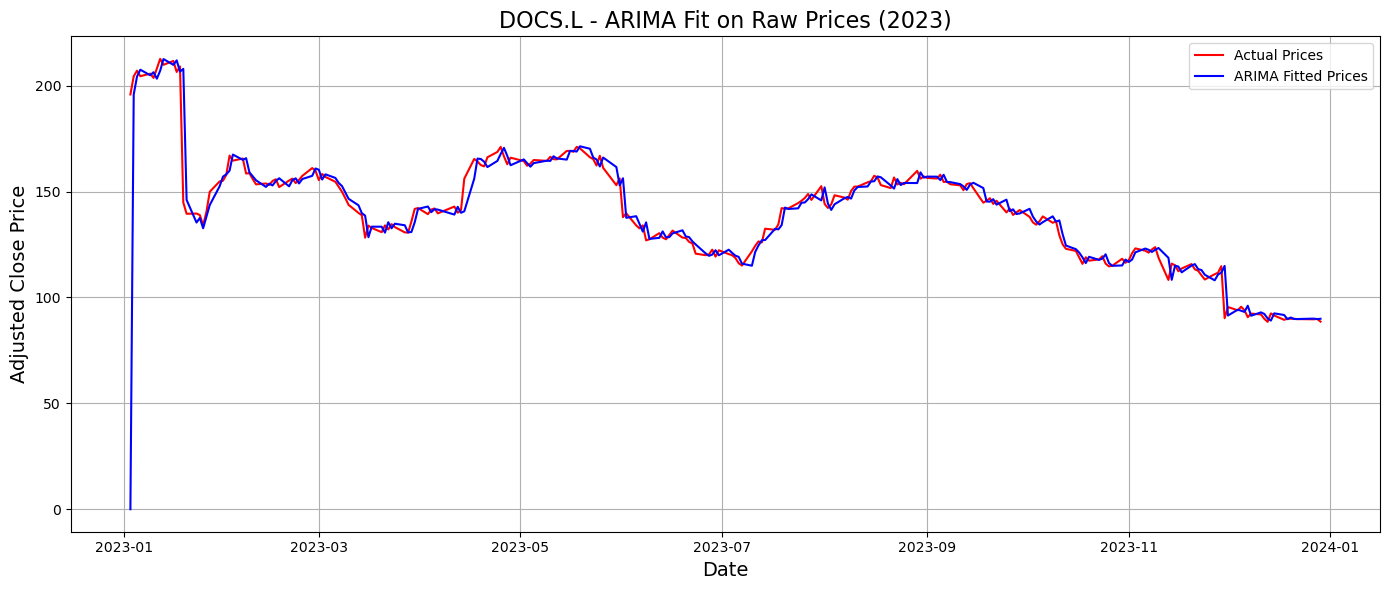

C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\U

MAE: 15.9302, RMSE: 20.4819


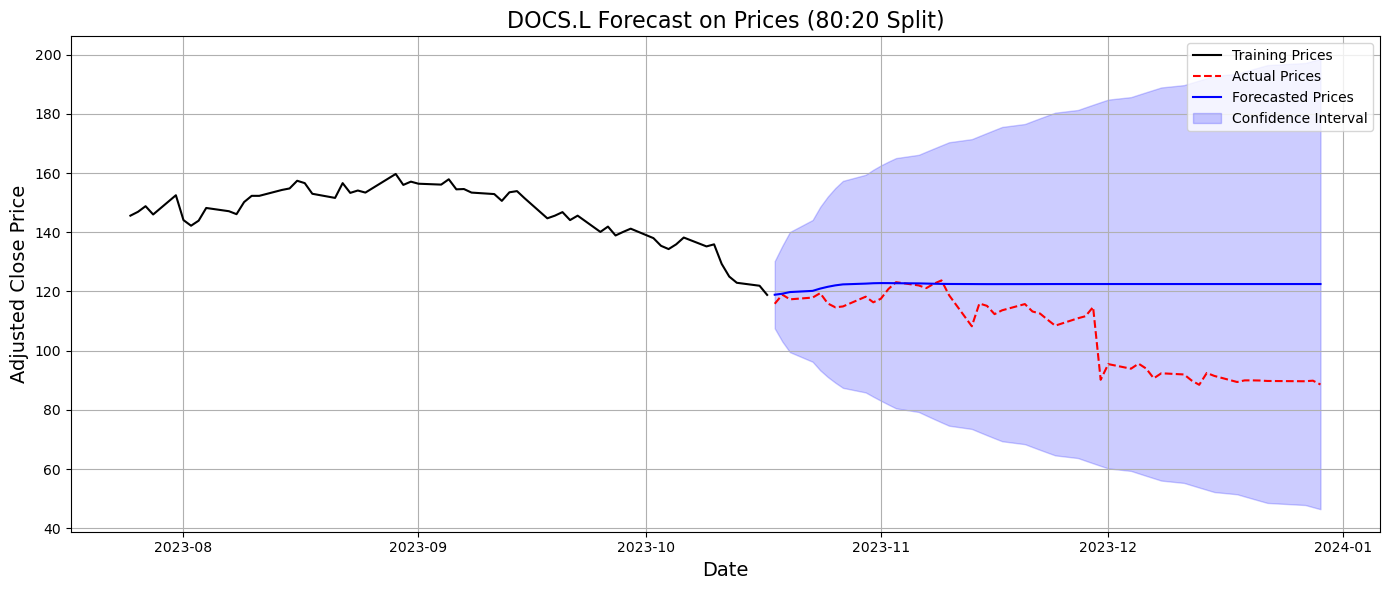

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Use raw adjusted close prices of DOCS
DOCS_prices = data_ftse["DOCS.L"].dropna()  
DOCS_prices.index = pd.to_datetime(DOCS_prices.index)

# Define ARIMA model 
model_full = sm.tsa.ARIMA(DOCS_prices, order=(5, 1, 1))
results_full = model_full.fit()
fitted_prices = results_full.fittedvalues

# Plot Actual vs Fitted price of DOCS stock
plt.figure(figsize=(14, 6))
plt.plot(DOCS_prices, label="Actual Prices", color='red')
plt.plot(fitted_prices, label="ARIMA Fitted Prices", color='blue')
plt.title("DOCS.L - ARIMA Fit on Raw Prices (2023)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Adjusted Close Price",fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Split the data into training and test sets (80/20)
split_DOCS = int(len(DOCS_prices) * 0.8)
train_DOCS = DOCS_prices.iloc[:split_DOCS]
test_Data = DOCS_prices.iloc[split_DOCS:]

# Fit ARIMA model on the training set of DOCS stock
model_split = sm.tsa.ARIMA(train_DOCS, order=(5, 1, 1))
results_split = model_split.fit()

# Forecast DOCS stock
forecast = results_split.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

forecast_mean.index = test_Data.index
conf_int.index = test_Data.index

# calculated Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(test_Data, forecast_mean)
rmse = np.sqrt(mean_squared_error(test_Data, forecast_mean))
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# Plot Forecast vs Actual price Of DOCS
plt.figure(figsize=(14, 6))
plt.plot(train_DOCS[-60:], label="Training Prices", color='black')
plt.plot(test_Data, label="Actual Prices", color='red', linestyle='--')
plt.plot(forecast_mean, label="Forecasted Prices", color='blue')
plt.fill_between(forecast_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='blue', alpha=0.2, label="Confidence Interval")
plt.title("DOCS.L Forecast on Prices (80:20 Split)", fontsize=16)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Adjusted Close Price",fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


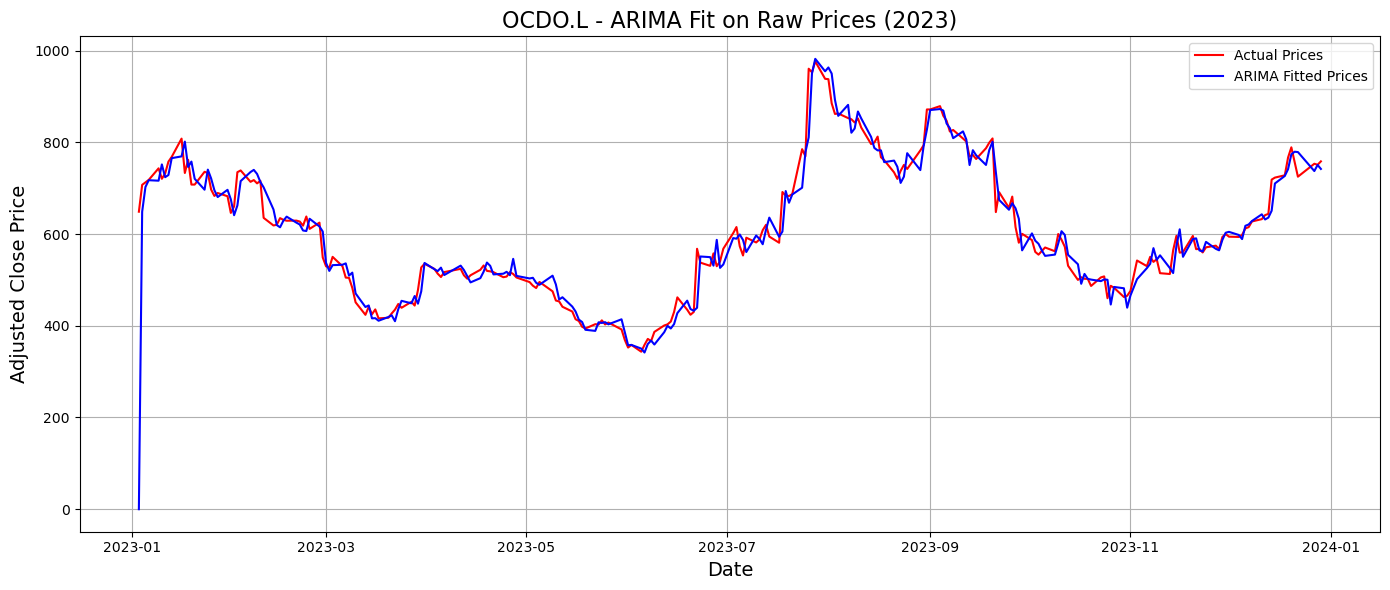

C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


MAE: 56.5115, RMSE: 71.4745


C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\divye\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


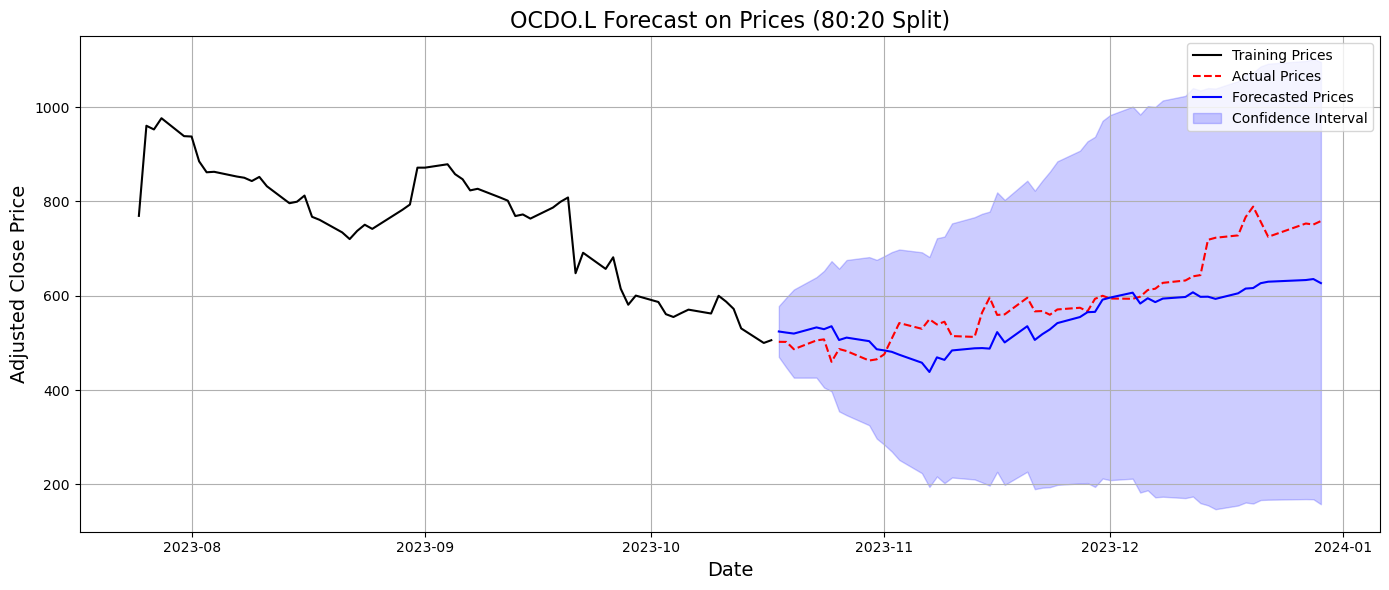

In [46]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Use raw adjusted close prices of OCDO
OCDO_prices = data_ftse["OCDO.L"].dropna()  
OCDO_prices.index = pd.to_datetime(OCDO_prices.index)

# Define ARIMA model 
model_full = sm.tsa.ARIMA(OCDO_prices, order=(53, 1, 2))
results_full = model_full.fit()
fitted_prices = results_full.fittedvalues

# Plot Actual vs Fitted price of OCDO stock
plt.figure(figsize=(14, 6))
plt.plot(OCDO_prices, label="Actual Prices", color='red')
plt.plot(fitted_prices, label="ARIMA Fitted Prices", color='blue')
plt.title("OCDO.L - ARIMA Fit on Raw Prices (2023)", fontsize=16)
plt.xlabel("Date", fontsize=14)
plt.ylabel("Adjusted Close Price",fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Split the data into training and test sets (80/20)
split_OCDO = int(len(OCDO_prices) * 0.8)
train_OCDO = OCDO_prices.iloc[:split_OCDO]
test_Data = OCDO_prices.iloc[split_OCDO:]

# Fit ARIMA model on the training set of OCDO stock
model_split = sm.tsa.ARIMA(train_OCDO, order=(53, 1, 2))
results_split = model_split.fit()

# Forecast OCDO stock
forecast = results_split.get_forecast(steps=len(test))
forecast_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

forecast_mean.index = test_Data.index
conf_int.index = test_Data.index

# calculated Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE)
mae = mean_absolute_error(test_Data, forecast_mean)
rmse = np.sqrt(mean_squared_error(test_Data, forecast_mean))
print(f"MAE: {mae:.4f}, RMSE: {rmse:.4f}")

# Plot Forecast vs Actual price Of OCDO
plt.figure(figsize=(14, 6))
plt.plot(train_OCDO[-60:], label="Training Prices", color='black')
plt.plot(test_Data, label="Actual Prices", color='red', linestyle='--')
plt.plot(forecast_mean, label="Forecasted Prices", color='blue')
plt.fill_between(forecast_mean.index,
                 conf_int.iloc[:, 0],
                 conf_int.iloc[:, 1],
                 color='blue', alpha=0.2, label="Confidence Interval")
plt.title("OCDO.L Forecast on Prices (80:20 Split)", fontsize=16)
plt.xlabel("Date",fontsize=14)
plt.ylabel("Adjusted Close Price",fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()